# DATA ANALYSIS FOR RADIAOACTIVE PARTICLE TRACKING SYSTEM
Done by: Sebastian Sarasti

### What is a radioactive particle tracking system?

* A Radioactive Particle Tracking (RPT) System is a setup of radiation detectors 
to determine the position of a radioactive particle.

* These systems typically employ NaI detectors, and put them around the system to measure.

* The RPT let users measure complex particle trajectory in opaque ducts. Without RPT, trying to see the particle movements inside opaque ducts is impossible. 

* The following gif gives an idea of how an RPT is.

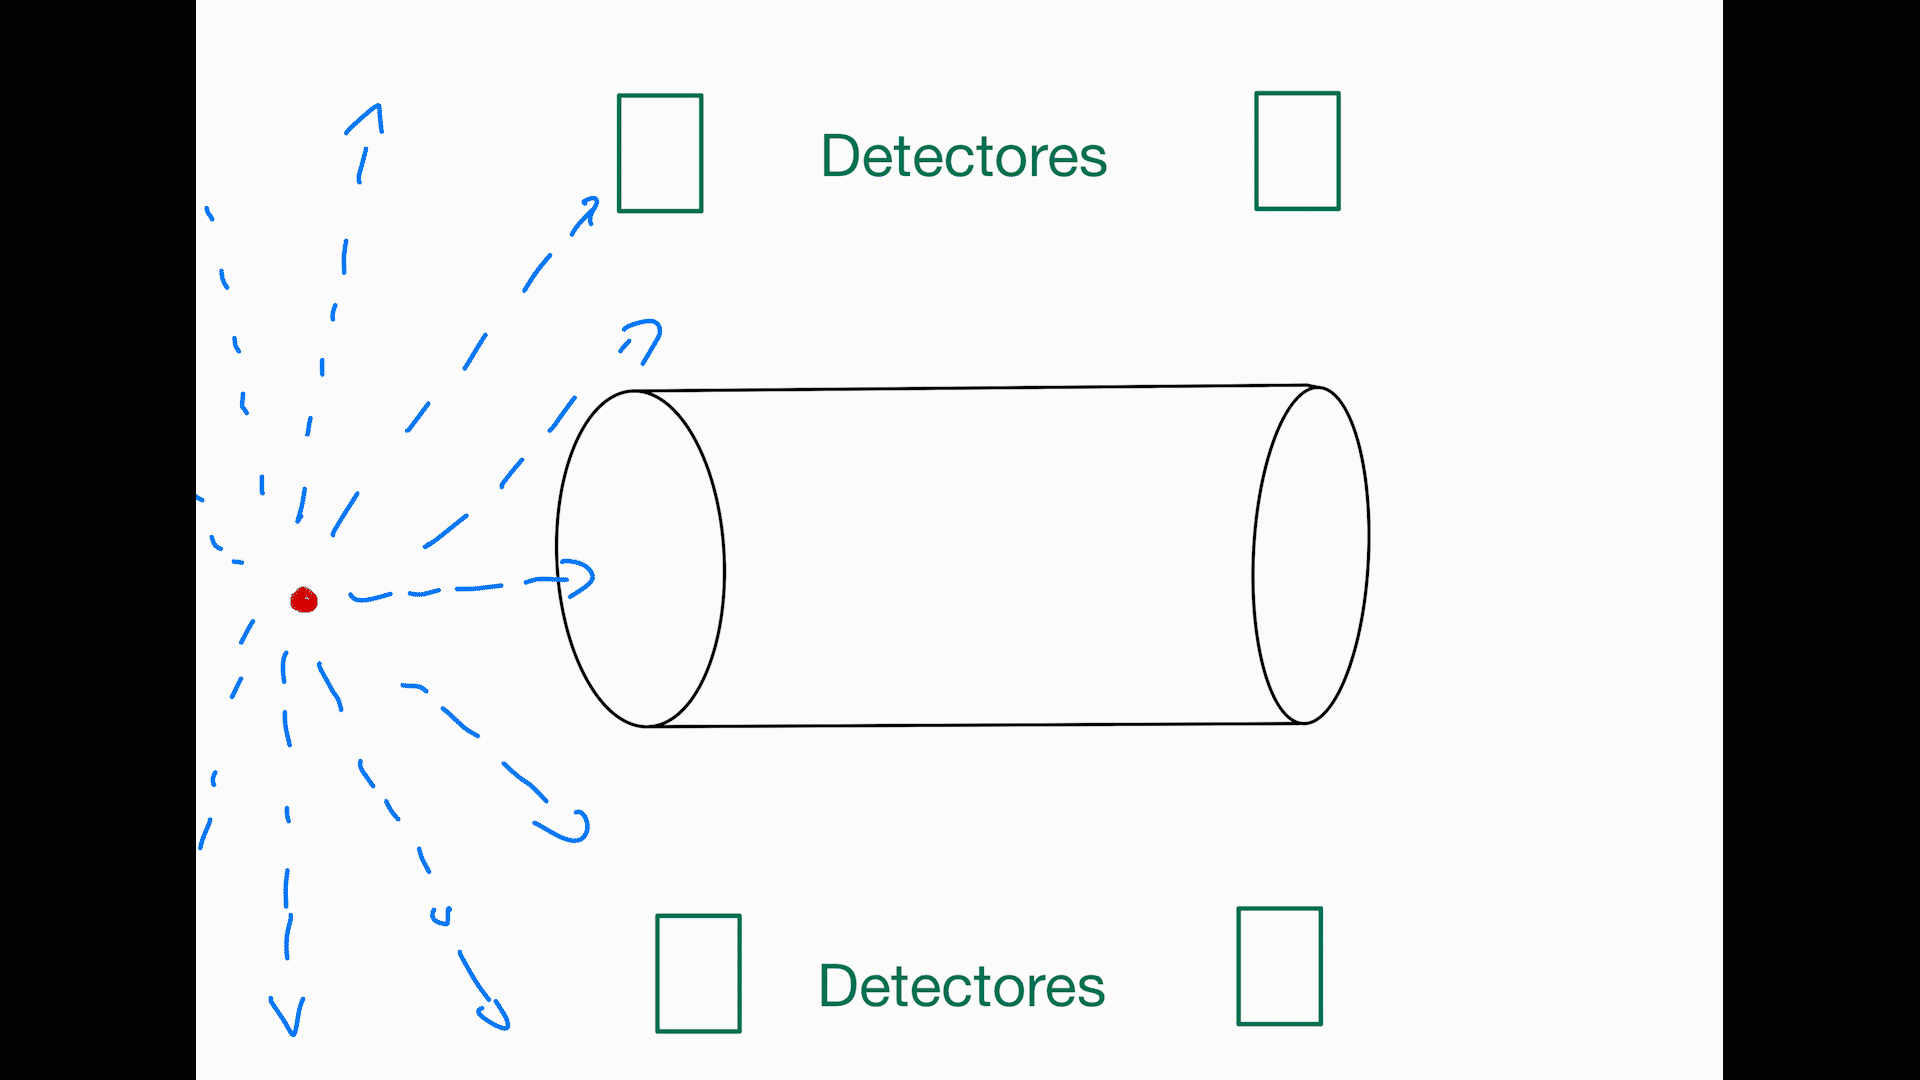

* What a radiation detector is able to record is particles emitted from the radiactive source per second. Therefore, it is needed a transformation into position information (Lagrangian field). The Lagrangian field in the fuild science describes the particle position around a sytem.

* While the particle moves around the system, the response of the radiation detector changes. This change in the response help out to transform **detections / second** into **radiation position**.

### Goal

To date, all RPT systems employ more than 10 detectors in a system. The high number of detector is a limitation to deploy this technique in the industry. Hence, new approaches should be developed to make RPT cost-affordable.

The goal is this notebook is analyze whether only four detector are able to generate enough information to reconstruct properly the particle trajectory.

## Data Engineering

In [ ]:
import matplotlib.ticker as ticker

In [ ]:
# import basic modules 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Establecer el tamaño de la fuente en 14
plt.rcParams.update({'font.size': 16})

In [ ]:
# mount drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* The RPT data was obtained from the SAS Application. The SAS application is run  on a Linux server, and the results are saved on a GitHub repository. 

In [ ]:
#load the data into the Colab memory
!pip install -q xlrd
!git clone https://github.com/sebassaras02/RPT_array_pos.git

Cloning into 'RPT_array_pos'...
remote: Enumerating objects: 111094, done.
remote: Total 111094 (delta 0), reused 0 (delta 0), pack-reused 111094
Receiving objects: 100% (111094/111094), 40.64 MiB | 16.40 MiB/s, done.
Resolving deltas: 100% (111004/111004), done.
Updating files: 100% (110011/110011), done.


### What does the detector response look like?

An RPT system record the gamma spectrum of the radioactive source. The following picture is an example.
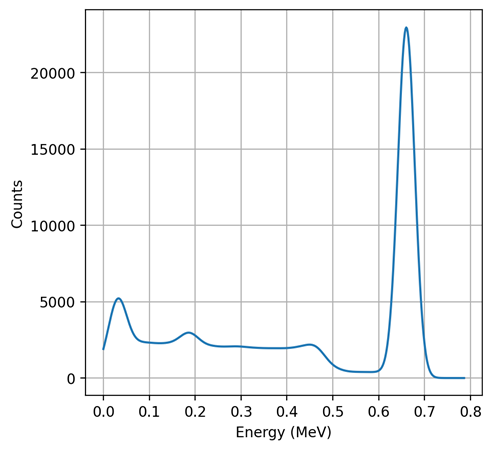

* This spectrum is recorded for each particle position, for each detector, and for each detector array. However, the useful information is only the counts per second in the peak (zone between 0.6 and 0.7 MeV). 

### What arrays were tested?

5 kinds of arrays were tested, each array had a radiation detector in a different position. The goal was to analyze which array gave the best information to reconstruct the particle position.

For instance:
Array 1
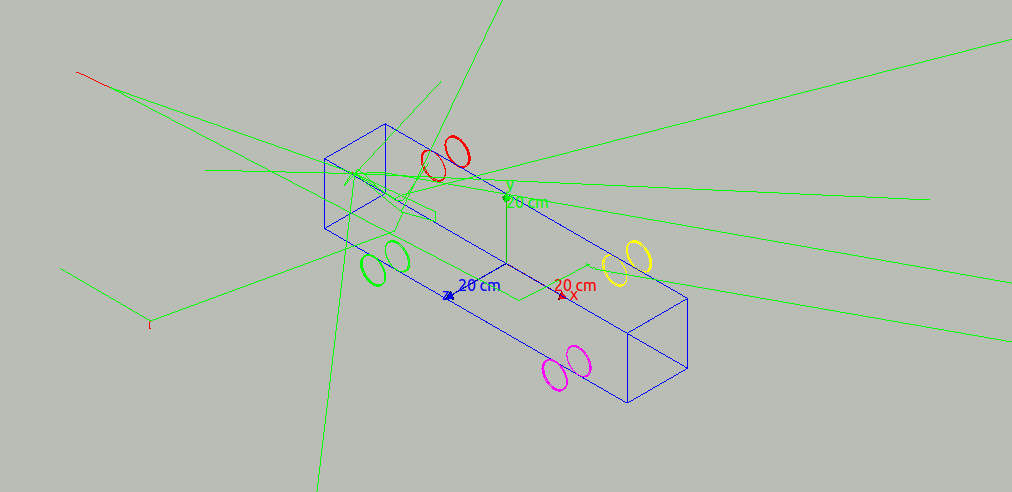

Array 2
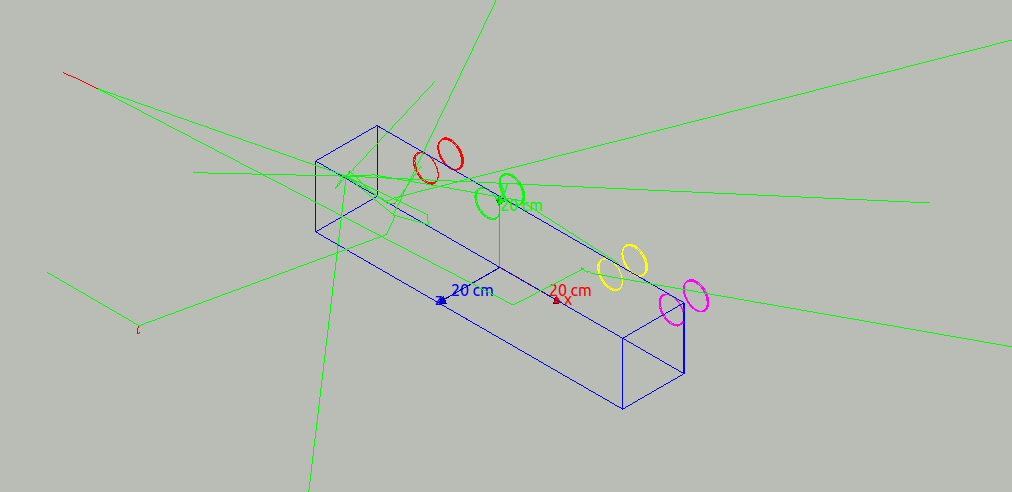

In [ ]:
# load data into arrays
arrays_training=[[],[],[],[],[]]
for i in range(5):
  for j in range(25):
    for k in range(200):
      arrays_training[i].append(np.loadtxt('/content/RPT_array_pos/det'+str(i+1)+'/results/RPT_det'+str(i+1)+'_hel_tra'+str(j+1)+'pos'+str(k+1)+'.dat'))
      arrays_training[i].append(np.loadtxt('/content/RPT_array_pos/det'+str(i+1)+'/results/RPT_det'+str(i+1)+'_str_tra'+str(j+1)+'pos'+str(k+1)+'.dat'))

Scale data according to the activity of the source.

Activity: 10 uCi = 370 000  Bq
The number of particles simulted 1E 6 

Normalization  = Particles simulated / Activity

In [ ]:
f_a = 1E6/370000

In [ ]:
for i in arrays_training:
  for j in i:
    j[:,1:] = j[:,1:]/f_a

It was created a tensor (i, j, k) to save all the data. 
1. The first dimension (i) is for each detector array.
2. The dimension (j) is for each particle position
3. The dimension (k) is for each detector response, but the first three values are the particle position in the X, Y and Z axes.




In [ ]:
counts_m=np.zeros((5,50*200,7))

Only the useful information was saved (the maximun value of the photopeak)

In [ ]:
for i in range(5):
  for j in range(10000):
    counts_m[i,j,3:7]=arrays_training[i][j].max(0)[1:5]

In [ ]:
# load positions of the trajectory
pos_tra = []
for i in range(25):
  pos_tra.append(np.loadtxt('/content/drive/MyDrive/RPT_SAS/traject_2/trajec_heli_3D'+str(i+1)+'.txt'))
  pos_tra.append(np.loadtxt('/content/drive/MyDrive/RPT_SAS/traject_2/trajec_line_3D'+str(i+1)+'.txt'))
  

In [ ]:
# adding the values of the positions
k=0
for i in range(50):
  counts_m[0,k:k+200,:3]=pos_tra[i]
  counts_m[1,k:k+200,:3]=pos_tra[i]
  counts_m[2,k:k+200,:3]=pos_tra[i]
  counts_m[3,k:k+200,:3]=pos_tra[i]
  counts_m[4,k:k+200,:3]=pos_tra[i]
  k=k+200

In [ ]:
# create 5 arrays for each detector array which each one has a dataframe for each detector array
det_array=[]
for i in range(5):
  det_array.append(pd.DataFrame(data=counts_m[i],columns=['x','y','z','Det-1','Det-2','Det-3','Det-4']))

Analyze basic features of the data

1. Summarazing information to each detector array

In [ ]:
#@title
for i in range(5):
  print('')
  print('Detector array '+str(i+1)+' information')
  print(det_array[i].info())


Detector array 1 information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   z       10000 non-null  float64
 3   Det-1   10000 non-null  float64
 4   Det-2   10000 non-null  float64
 5   Det-3   10000 non-null  float64
 6   Det-4   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None

Detector array 2 information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   z       10000 non-null  float64
 3   Det-1   10000 non-null  float64
 4   Det-2   10000 non-null  float64
 5   Det-3   10000 non-null  float64
 6   Det-4   10000 non-null  float64
dtypes: float

From the each data set information, it can be concluded that there is not null values. Each column has 10000 values, and the dtype of information is float64

2. Obtain the statistical features of each data set

In [ ]:
#@title
for i in range(5):
  print('Statistical information of the array '+str(i+1))
  print(det_array[i].iloc[:,3:].describe())
  print(' ')

Statistical information of the array 1
              Det-1         Det-2         Det-3          Det-4
count  10000.000000  10000.000000  10000.000000   10000.000000
mean      45.571605    266.528353    129.122526    1357.151379
std      182.554619    387.301684    199.448005    4022.918241
min        0.370000      1.480000      1.480000       0.740000
25%        0.740000     55.500000     46.620000     280.367500
50%        2.590000    114.330000     75.110000     613.460000
75%       12.580000    320.790000    123.210000    1342.915000
max     2709.140000   3643.020000   2575.940000  109169.980000
 
Statistical information of the array 2
              Det-1         Det-2         Det-3         Det-4
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      45.053087     64.046593    128.698543    187.741293
std      182.655712    177.811489    199.519357    209.725368
min        0.000000      0.370000      1.480000      0.740000
25%        0.740000      2.960000     46.99

In [ ]:
f_a

2.7027027027027026

In [ ]:
for i in range(5):
  det_array[i]['Count total'] = 0
  det_array[i]['Count total'] = det_array[i][['Det-1', 'Det-2','Det-3','Det-4']].apply(lambda x: sum(x), axis = 1)
  det_array[i]['Std point'] = det_array[i][['Det-1', 'Det-2','Det-3','Det-4']].apply(lambda x: np.sqrt((x[0]/f_a+x[1]/f_a+x[2]/f_a+x[3]/f_a)), axis =1)

In [ ]:
det_array[1].head()

,x,y,z,Det-1,Det-2,Det-3,Det-4,Count total,Std point
0,0.000000,0.107288,0.100000,546.12,118.77,6.29,1.48,672.66,15.776064
1,0.005025,0.107287,0.100519,444.00,106.19,7.03,0.74,557.96,14.368201
2,0.010050,0.107284,0.101038,559.07,123.95,5.92,1.48,690.42,15.982972
3,0.015075,0.107279,0.101556,459.17,112.85,7.40,0.74,580.16,14.651253
4,0.020101,0.107273,0.102074,570.17,128.39,7.40,1.48,707.44,16.178776


Plot the cumulative count per point

In [ ]:
# define a function to plot a 3D box
def plot_box_3d(x_l, y_l, z_l, axis_p, alpha_val=0.3):
    # face 1
    xl1 = np.linspace(0, x_l, 100, endpoint=True)
    yl1 = np.linspace(0, y_l, 100, endpoint=True)
    Xl1, Yl1 = np.meshgrid(xl1, yl1)
    zl1 = np.full(len(np.ravel(Xl1)), 0)
    Zl1 = zl1.reshape(Xl1.shape)
    # face 2
    xl2 = np.linspace(0, x_l, 100, endpoint=True)
    yl2 = np.linspace(0, y_l, 100, endpoint=True)
    Xl2, Yl2 = np.meshgrid(xl2, yl2)
    zl2 = np.full(len(np.ravel(Xl2)), z_l)
    Zl2 = zl2.reshape(Xl2.shape)
    # face 3
    xl3 = np.linspace(0, x_l, 100, endpoint=True)
    zl3 = np.linspace(0, z_l, 100, endpoint=True)
    Xl3, Zl3 = np.meshgrid(xl3, zl3)
    yl3 = np.full(len(np.ravel(Xl3)), 0)
    Yl3 = yl3.reshape(Xl3.shape)
    # face 4
    xl4 = np.linspace(0, x_l, 100, endpoint=True)
    zl4 = np.linspace(0, z_l, 100, endpoint=True)
    Xl4, Zl4 = np.meshgrid(xl4, zl4)
    yl4 = np.full(len(np.ravel(Xl4)), y_l)
    Yl4 = yl4.reshape(Xl4.shape)
    axis_p.plot_surface(Xl1, Yl1, Zl1, alpha=alpha_val, color='green')
    axis_p.plot_surface(Xl2, Yl2, Zl2, alpha=alpha_val, color='green')
    axis_p.plot_surface(Xl3, Yl3, Zl3, alpha=alpha_val, color='green')
    axis_p.plot_surface(Xl4, Yl4, Zl4, alpha=alpha_val, color='green')

In [ ]:
from matplotlib.ticker import MaxNLocator

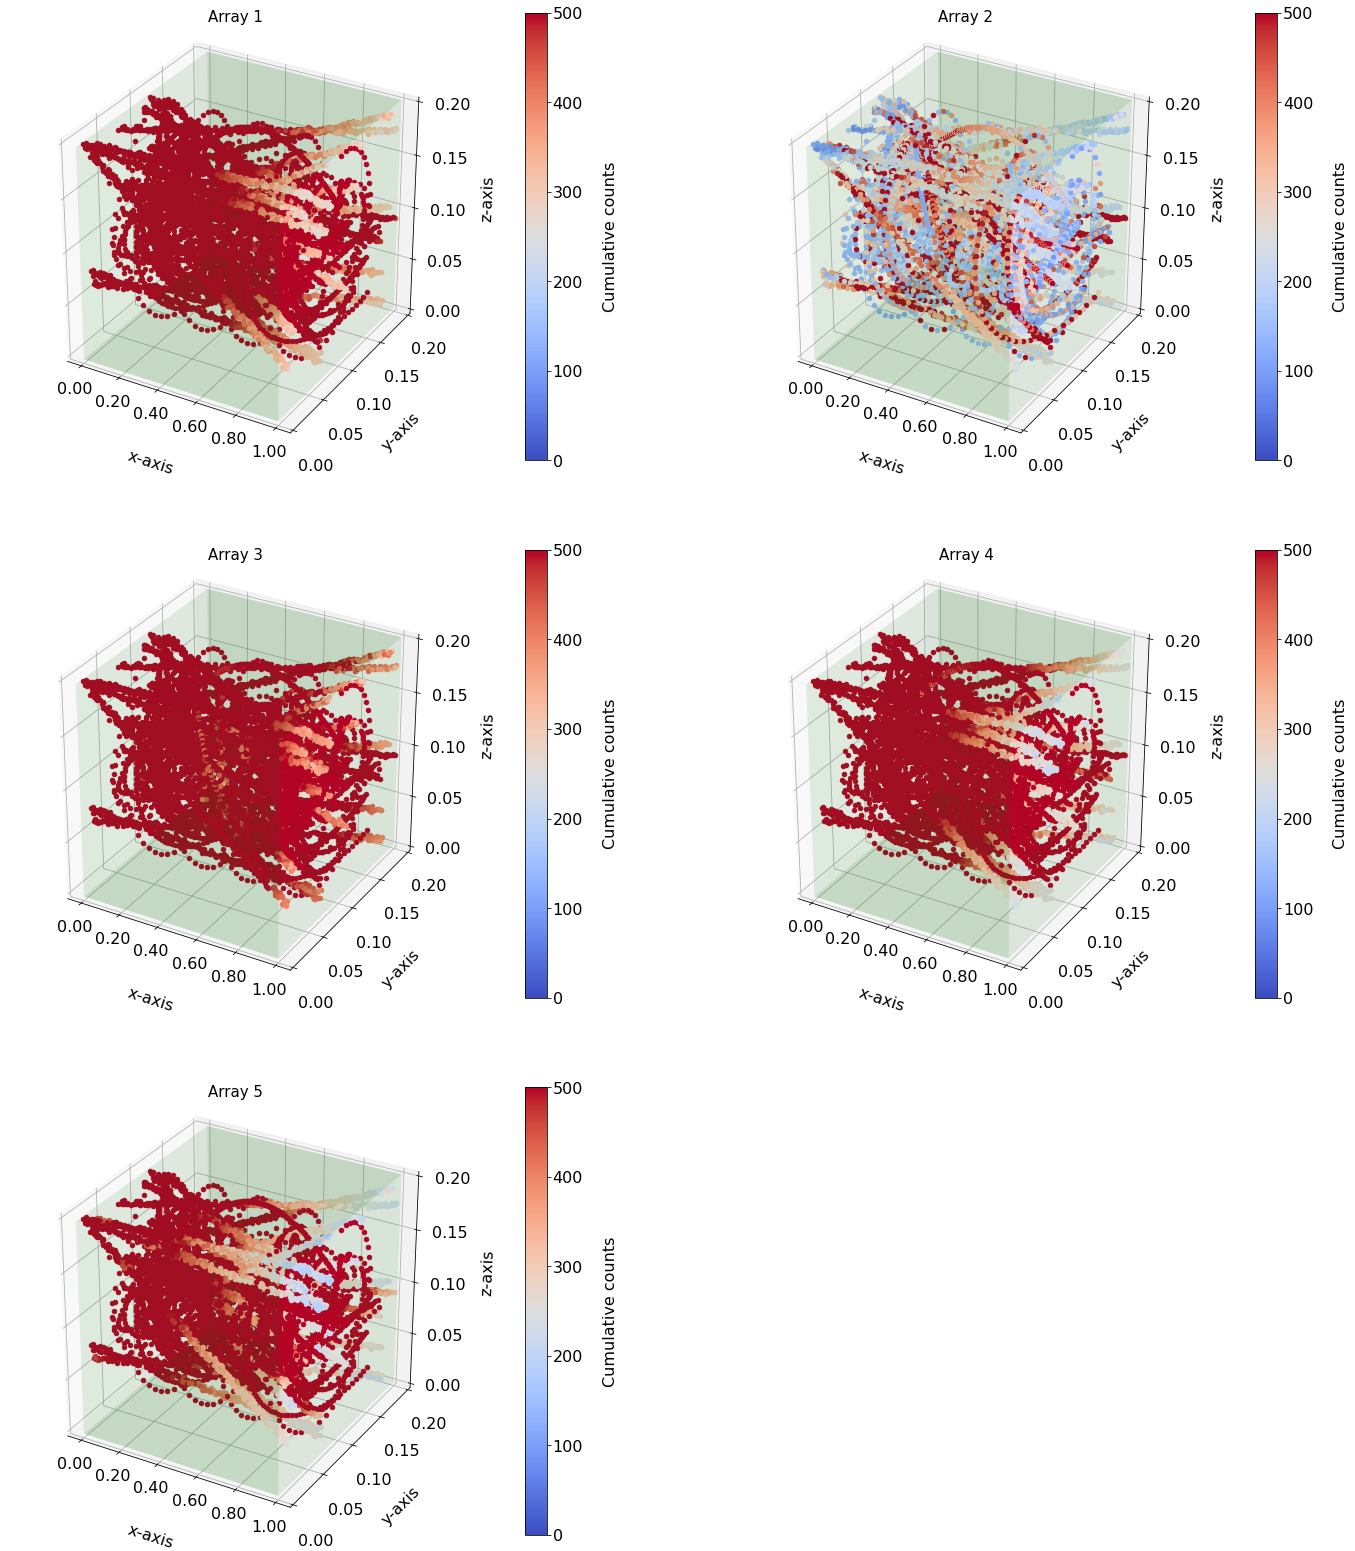

In [ ]:
#@title
fig1, ax1 = plt.subplots(3,2,subplot_kw=dict(projection='3d'),figsize=(24,28))
m=0
color_map='coolwarm'
# gist_rainbow
for i in range(3):
  for j in range(2):
    if i==2 and j==1:
      ax1[i,j].axis('off')
    else:
      plot_box_3d(1, 0.2, 0.2, ax1[i,j], alpha_val=0.1)
      for k in range(10000):
        ax1[i,j].set_ylim(0,0.2)
        ax1[i,j].set_zlim(0,0.2)
        ax1[i,j].set_xlabel('x-axis', labelpad = 25)
        ax1[i,j].set_ylabel('y-axis', labelpad = 30)
        ax1[i,j].set_zlabel('z-axis', labelpad = 30)
        ax1[i,j].set_title('Array '+str(m+1),y=1.05, fontsize=15)
        p=ax1[i,j].scatter(det_array[m].iloc[k,0],det_array[m].iloc[k,1],det_array[m].iloc[k,2],c=det_array[m].loc[k, 'Count total'],cmap = 'coolwarm', vmin = 0, vmax = 500)
        ax1[i,j].yaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].zaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].tick_params(axis = 'y', pad=15)
        ax1[i,j].tick_params(axis = 'z', pad=15)
        # ax1[i,j].set_yticklabels(ax1[i,j].get_yticks(), fontsize=13)
        ax1[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        # ax1[i,j].set_xticklabels(ax1[i,j].get_xticks(), fontsize=13)
        ax1[i,j].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        # ax1[i,j].set_zticklabels(ax1[i,j].get_zticks(), fontsize=13)
        ax1[i,j].zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
      cbar=fig1.colorbar(p,ax=ax1[i,j], pad = 0.1) 
      cbar.set_label("Cumulative counts", rotation=90, labelpad=20)
      cbar.ax.tick_params(pad=2)
      m=m+1

See how the uncertity is distribuited along the pipe

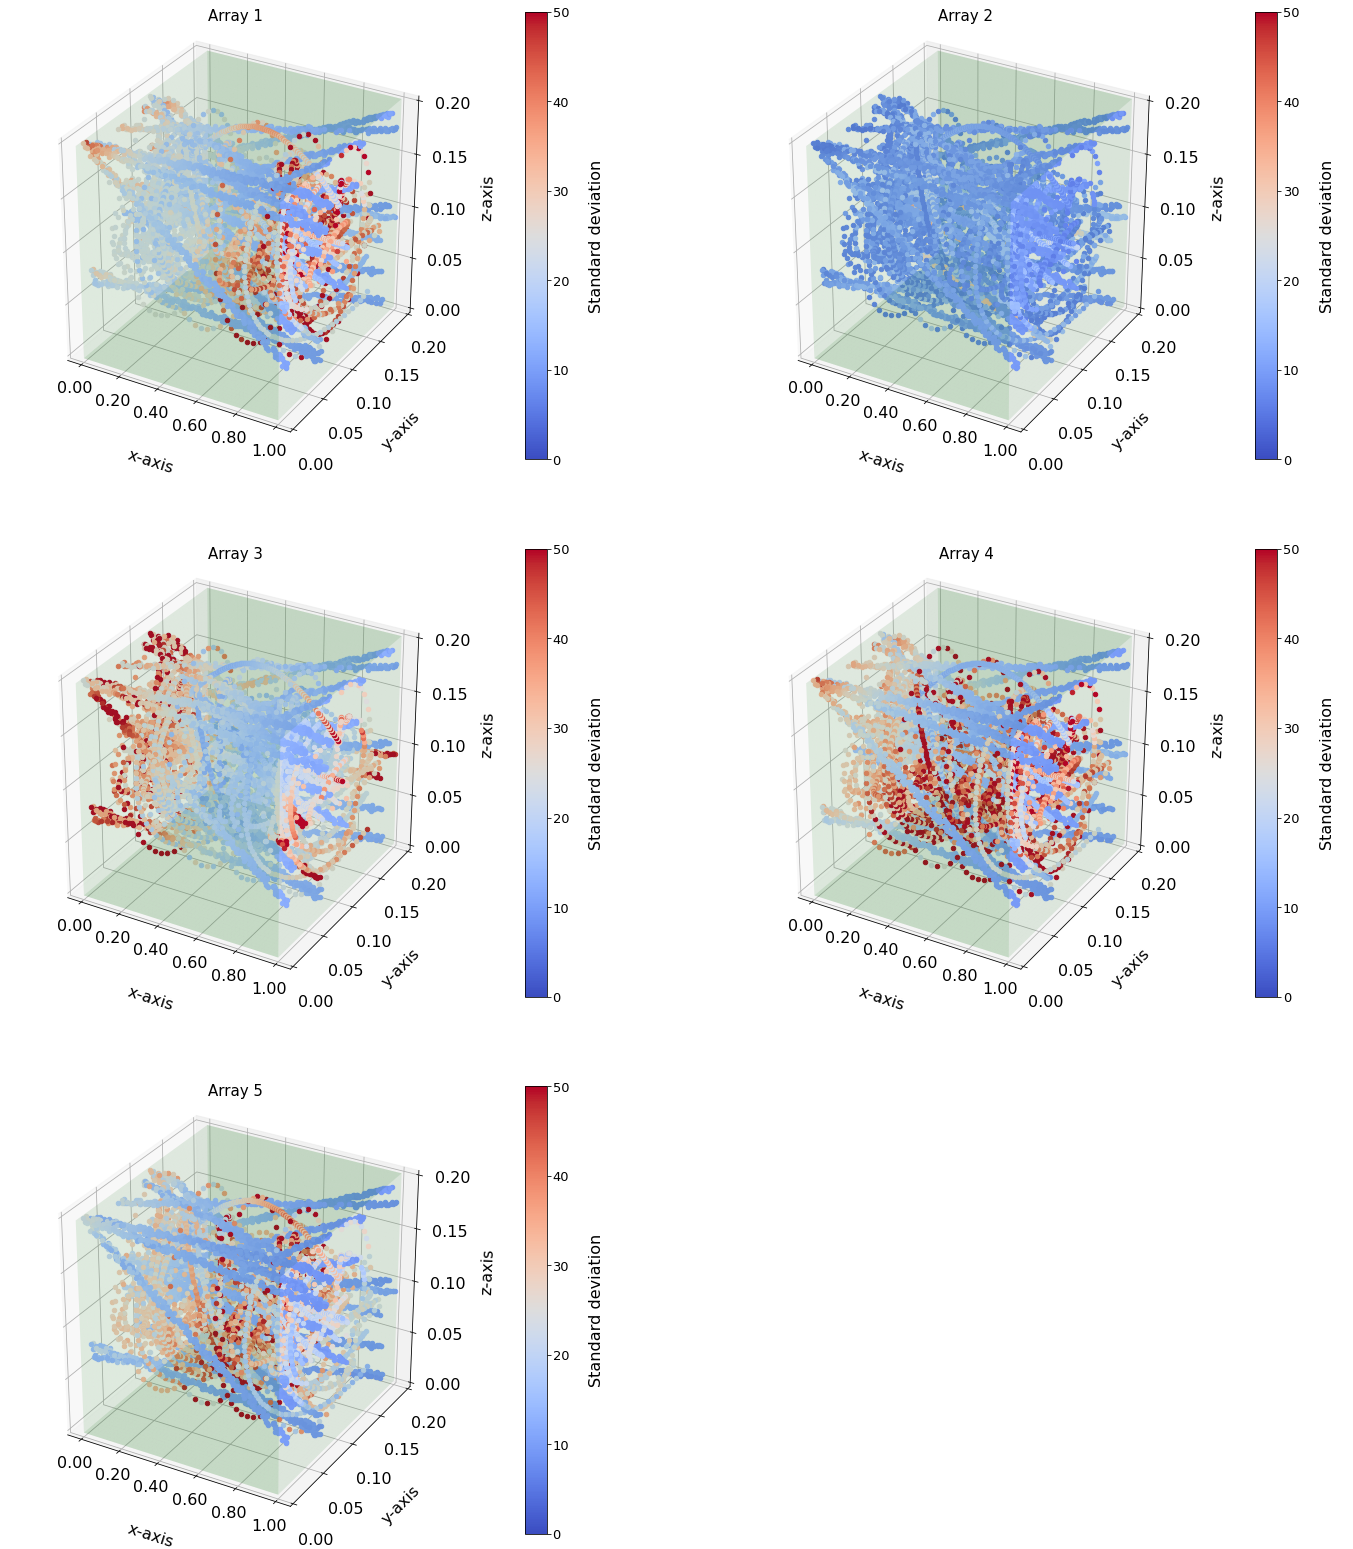

In [ ]:
#@title
fig1, ax1 = plt.subplots(3,2,subplot_kw=dict(projection='3d'),figsize=(24,28))
m=0
color_map='coolwarm'
for i in range(3):
  for j in range(2):
    if i==2 and j==1:
      ax1[i,j].axis('off')
    else:
      plot_box_3d(1, 0.2, 0.2, ax1[i,j], alpha_val=0.1)
      for k in range(10000):
        ax1[i,j].set_ylim(0,0.2)
        ax1[i,j].set_zlim(0,0.2)
        ax1[i,j].set_xlabel('x-axis', labelpad = 25)
        ax1[i,j].set_ylabel('y-axis', labelpad = 30)
        ax1[i,j].set_zlabel('z-axis', labelpad = 30)
        ax1[i,j].set_title('Array '+str(m+1),y=1.05, fontsize=15)
        p=ax1[i,j].scatter(det_array[m].iloc[k,0],det_array[m].iloc[k,1],det_array[m].iloc[k,2],c=det_array[m].loc[k, 'Std point'],cmap = 'coolwarm', vmin = 0, vmax = 50)
        ax1[i,j].yaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].zaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].tick_params(axis = 'y', pad=15)
        ax1[i,j].tick_params(axis = 'z', pad=15)
        # ax1[i,j].set_yticklabels(ax1[i,j].get_yticks(), fontsize=13)
        ax1[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        # ax1[i,j].set_xticklabels(ax1[i,j].get_xticks(), fontsize=13)
        ax1[i,j].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        # ax1[i,j].set_zticklabels(ax1[i,j].get_zticks(), fontsize=13)
        ax1[i,j].zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
      cbar=fig1.colorbar(p,ax=ax1[i,j], pad = 0.1) 
      cbar.set_label("Standard deviation", rotation=90, labelpad=20)
      cbar.ax.tick_params(pad=2, labelsize = 13)
      m=m+1

See the cumulative sum of the counts and the std

In [ ]:
val = []
for i in range(5):
  print('Cumulative sum of the detector array ' + str(i+1))
  print(sum(det_array[i]['Count total']))
  val.append(sum(det_array[i]['Count total']))
  print('Standar deviation')
  print(np.sqrt(sum(det_array[i]['Count total'])))
  print('')

Cumulative sum of the detector array 1
17983738.629999984
Standar deviation
4240.723833262428

Cumulative sum of the detector array 2
4255395.159999997
Standar deviation
2062.8609163004658

Cumulative sum of the detector array 3
21883784.309999954
Standar deviation
4678.010721449872

Cumulative sum of the detector array 4
29566338.879999895
Standar deviation
5437.493805053932

Cumulative sum of the detector array 5
19714330.750000052
Standar deviation
4440.0822909040835



3. Trying to find a complex relationship among each variable

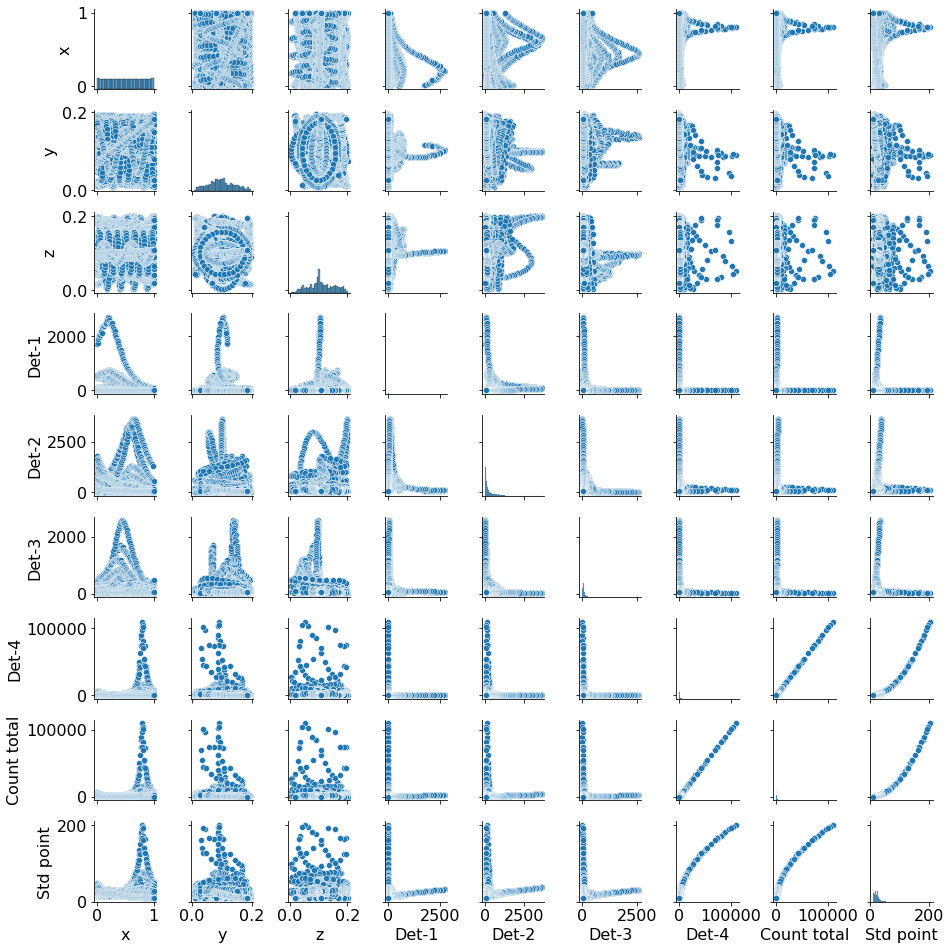

In [ ]:
#@title
import seaborn as sns

sns.pairplot(det_array[0],  height=1.5);

It was not clear a pattern to identify something like a potencial, exponential, or polynomical relation

4. Analyze the existence of linear relationship between each variable

In [ ]:
#@title
# see wheter is available linear relation among the data
corr_matrix=[]
for i in range(5):
  corr_matrix.append(det_array[i].corr().iloc[0:3,3:7])

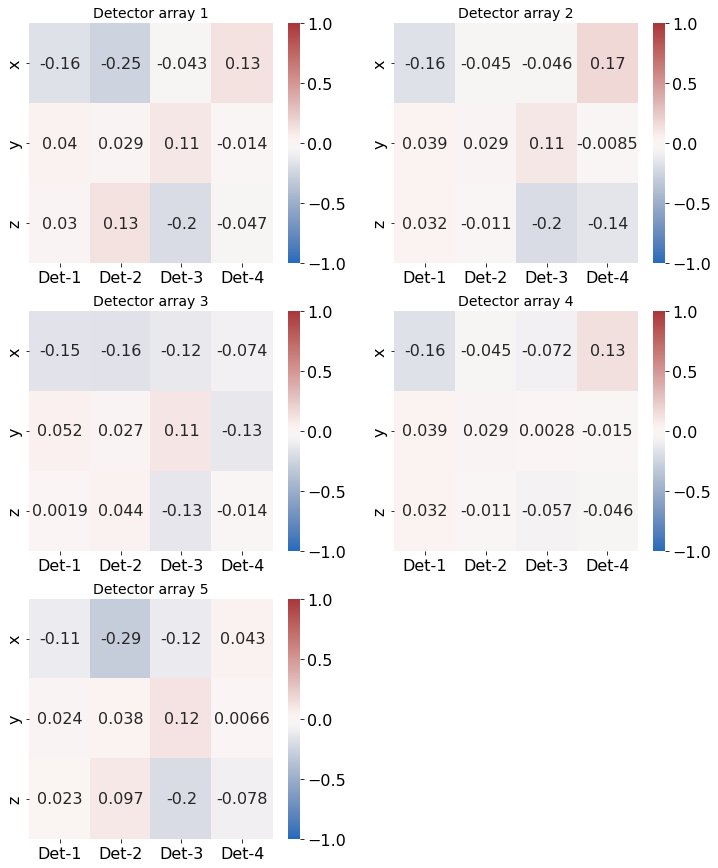

In [ ]:
#@title
# plotting the relation
import seaborn as sns
fig1, ax1=plt.subplots(3,2,figsize=(12,15))
sns.color_palette("vlag", as_cmap=True)
k=0
for i in range(3):
  for j in range(2):
    if (i==2 and j==1):
      ax1[i,j].axis('off')
    else:
      sns.heatmap(ax=ax1[i,j],data=corr_matrix[k], annot=True,vmin=-1,vmax=1, cmap='vlag')
      ax1[i,j].set_title('Detector array '+str(k+1),fontsize=14)
      k=k+1
plt.savefig('correlation_matrixes.jpg',dpi=300)  

From the correlation matrix is evident that there is not a linear correlation between one axis and a detector response. Hence, it can not be done with linear regressions for future machine learning algorithms

5. Analyze if there is any kind of correlation between the data

In [ ]:
#@title
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 50.8 MB/s eta 0:00:00


In [ ]:
#@title
import phik

interval columns not set, guessing: ['x', 'y', 'z', 'Det-1', 'Det-2', 'Det-3', 'Det-4', 'Count total', 'Std point']
interval columns not set, guessing: ['x', 'y', 'z', 'Det-1', 'Det-2', 'Det-3', 'Det-4', 'Count total', 'Std point']
interval columns not set, guessing: ['x', 'y', 'z', 'Det-1', 'Det-2', 'Det-3', 'Det-4', 'Count total', 'Std point']
interval columns not set, guessing: ['x', 'y', 'z', 'Det-1', 'Det-2', 'Det-3', 'Det-4', 'Count total', 'Std point']
interval columns not set, guessing: ['x', 'y', 'z', 'Det-1', 'Det-2', 'Det-3', 'Det-4', 'Count total', 'Std point']


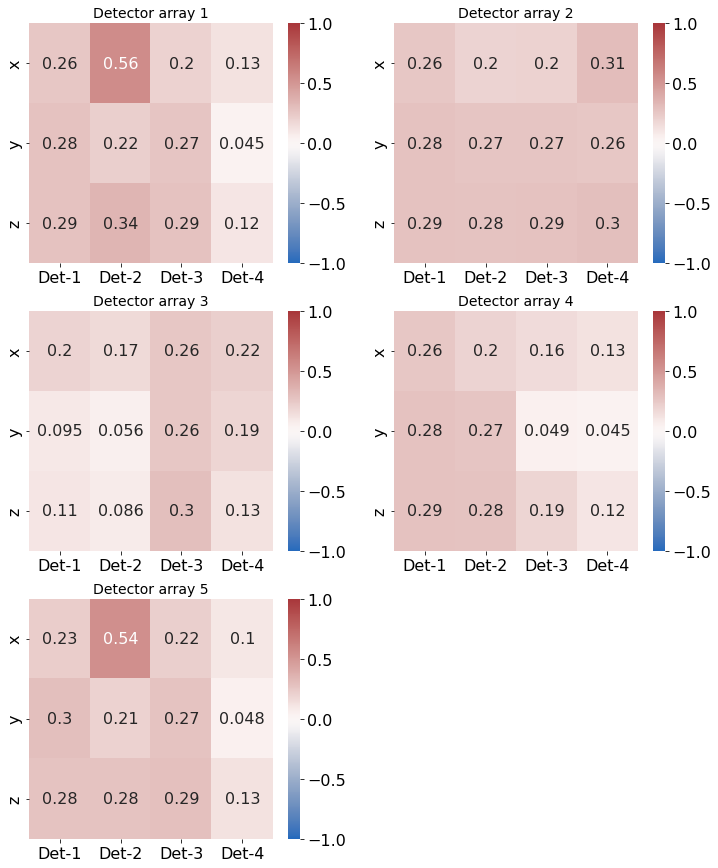

In [ ]:
#@title
# see wheter is available linear relation among the data
corr_matrix=[]
for i in range(5):
  corr_matrix.append(det_array[i].phik_matrix().iloc[0:3,3:7])

fig1, ax1=plt.subplots(3,2,figsize=(12,15))
sns.color_palette("vlag", as_cmap=True)
k=0
for i in range(3):
  for j in range(2):
    if (i==2 and j==1):
      ax1[i,j].axis('off')
    else:
      sns.heatmap(ax=ax1[i,j],data=corr_matrix[k], annot=True,vmin=-1,vmax=1, cmap='vlag')
      ax1[i,j].set_title('Detector array '+str(k+1),fontsize=14)
      k=k+1
plt.savefig('correlation_matrixes.jpg',dpi=300)  

### Data for testing

Load data that is going to be in the testing stage. The testing data is not going to be used in any stage of the training.

Load data for the test

In [ ]:
# load data for testing the models
arrays_test=[[],[],[],[],[]]
for i in range(5):
    for k in range(1000):
      arrays_test[i].append(np.loadtxt('/content/RPT_array_pos/Test_RPT/det'+str(i+1)+'/results/RPT_det'+str(i+1)+'_test_point'+str(k+1)+'.dat'))

In [ ]:
counts_test=np.zeros((5,1000,7))
# adding values of the points
for i in range(5):
  counts_test[i,:,:3]=np.loadtxt('/content/drive/MyDrive/RPT_SAS/test_points_2_RPT.txt')
  for j in range(1000):
    counts_test[i,j,3:7]=arrays_test[i][j].max(0)[1:5]

In [ ]:
# create dataframes and assing each values
test_array=[]
for i in range(5):
  test_array.append(pd.DataFrame(data=counts_test[i],columns=['x','y','z','Det-1','Det-2','Det-3','Det-4']))

In [ ]:
for k in range(5):
  for i in range(1000):
    test_array[k].iloc[i,0]=test_array[k].iloc[i,0]+0.5
    test_array[k].iloc[i,1]=test_array[k].iloc[i,1]+0.1
    test_array[k].iloc[i,2]=test_array[k].iloc[i,2]+0.1

The data for training and testing was linked to make the same normalization

In [ ]:
# concat test and traing array
total_array=[]
for i in range(5):
  total_array.append(pd.concat([det_array[i],test_array[i]],ignore_index=True,axis=0))

Normalize the data with a MinMaxScaler

In [ ]:
# normalize the data with minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=[MinMaxScaler() for i in range(5)]
for i in range(5):
  total_array[i].iloc[:,3:]=(scaler[i].fit_transform(total_array[i].iloc[:,3:]))

Export the data for future works

In [ ]:
from copy import deepcopy

In [ ]:
total_array_e = deepcopy(total_array)
for i in range(5):
   total_array_e[i].iloc[:,3:]= scaler[i].inverse_transform(total_array[i].iloc[:,3:])

In [ ]:
test_array[1]

,x,y,z,Det-1,Det-2,Det-3,Det-4
0,0.187831,0.143441,0.178549,421.0,374.0,29.0,4.0
1,0.352387,0.102012,0.141314,274.0,894.0,133.0,27.0
2,0.980886,0.035083,0.073541,3.0,27.0,494.0,2164.0
3,0.452318,0.053758,0.185552,78.0,281.0,129.0,30.0
4,0.820911,0.185513,0.142795,8.0,32.0,529.0,660.0
...,...,...,...,...,...,...,...
995,0.234773,0.152628,0.061698,1927.0,3095.0,147.0,30.0
996,0.504409,0.083876,0.035433,351.0,1784.0,1893.0,360.0
997,0.733244,0.060354,0.038693,45.0,286.0,6054.0,2293.0
998,0.871950,0.121176,0.182642,3.0,15.0,276.0,488.0


In [ ]:
total_array_e[1]

,x,y,z,Det-1,Det-2,Det-3,Det-4,Count total,Std point
0,0.000000,0.107288,0.100000,546.12,118.77,6.29,1.48,672.66,15.776064
1,0.005025,0.107287,0.100519,444.00,106.19,7.03,0.74,557.96,14.368201
2,0.010050,0.107284,0.101038,559.07,123.95,5.92,1.48,690.42,15.982972
3,0.015075,0.107279,0.101556,459.17,112.85,7.40,0.74,580.16,14.651253
4,0.020101,0.107273,0.102074,570.17,128.39,7.40,1.48,707.44,16.178776
...,...,...,...,...,...,...,...,...,...
10995,0.234773,0.152628,0.061698,1927.00,3095.00,147.00,30.00,NaN,NaN
10996,0.504409,0.083876,0.035433,351.00,1784.00,1893.00,360.00,NaN,NaN
10997,0.733244,0.060354,0.038693,45.00,286.00,6054.00,2293.00,NaN,NaN
10998,0.871950,0.121176,0.182642,3.00,15.00,276.00,488.00,NaN,NaN


In [ ]:
for i in range(5):
  total_array_e[i].to_csv(path_or_buf='Array'+str(i+1)+'.csv')


Split the data again into training and test

In [ ]:
train_data_n=[]
test_data_n=[]
for i in range(5):
  train_data_n.append(total_array[i][0:10000])
  test_data_n.append(total_array[i][10000:].reset_index(drop=True))

## Machine Learning Modeling

This is going to be built two types of algorithms K-NN regressors and Feed Forward Neural Networks. 

> K-NN is choosen because it is able to generate new predictions based on the neighborhs observations.

> Feed Forward Neural Network was choosen because its flexibility to change the weigths and bias along each iteration.

### K-NN Regressor

Define a function to create the K-NN regressor

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# def knn_model_wot(Xtrain,Ytrain):
#   model=KNeighborsRegressor(n_neighbors=10,weights='distance')
#   model_trained=model.fit(Xtrain,Ytrain)
#   return model_trained

Train the K-NN regressor

In [ ]:
# create an empthy array to save each model knn to predict position
# these models do not have a hyperparameter tunning
# knn_reg_wot=[]
# for i in range(5):  
#   knn_reg_wot.append(knn_model_wot(train_data_n[i].iloc[:,3:],train_data_n[i].iloc[:,:3]))   

Export the models

In [ ]:
# import pickle

In [ ]:
# for i in range(len(knn_reg_wot)):
#   with open('regressor'+str(i+1)+'.pkl', 'wb') as file:
#       pickle.dump(knn_reg_wot[i], file)

In [ ]:
knn_reg_wot = []

Once the models were trained, they're loaded

In [ ]:
import pickle

In [ ]:
# Load from file
path1 ='/content/drive/MyDrive/RPT_SAS/modelos/modelos_KNN/regressor1.pkl' 
path2 ='/content/drive/MyDrive/RPT_SAS/modelos/modelos_KNN/regressor2.pkl' 
path3 ='/content/drive/MyDrive/RPT_SAS/modelos/modelos_KNN/regressor3.pkl' 
path4 ='/content/drive/MyDrive/RPT_SAS/modelos/modelos_KNN/regressor4.pkl' 
path5 ='/content/drive/MyDrive/RPT_SAS/modelos/modelos_KNN/regressor5.pkl' 

with open(path1, 'rb') as file:
    pickle_model = pickle.load(file)
    knn_reg_wot.append(pickle_model)

with open(path2, 'rb') as file:
    pickle_model = pickle.load(file)
    knn_reg_wot.append(pickle_model)

with open(path3, 'rb') as file:
    pickle_model = pickle.load(file)
    knn_reg_wot.append(pickle_model)

with open(path4, 'rb') as file:
    pickle_model = pickle.load(file)
    knn_reg_wot.append(pickle_model)

with open(path5, 'rb') as file:
    pickle_model = pickle.load(file)
    knn_reg_wot.append(pickle_model)

Test the K-NN regressor

In [ ]:
# generate the values predicted with model trained without tunning
Y_pred_knn=[]
for i in range(5):
  Y_pred_knn.append(knn_reg_wot[i].predict(test_data_n[i].iloc[:,3:7]))

Measure the bias of the predictions with MAE


In [ ]:
# measure how good was the training with MAE 
from sklearn.metrics import mean_absolute_error
MAE_knn=[];
for i in range(5):
  MAE_knn.append(mean_absolute_error(test_data_n[i].iloc[:,:3],Y_pred_knn[i]))

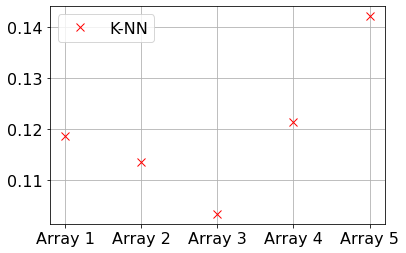

In [ ]:
# plot the MSE in each data set
array_used=['Array 1','Array 2','Array 3','Array 4','Array 5']
plt.plot(array_used, MAE_knn, 'xr', markersize='8', label='K-NN')
plt.grid()
plt.legend()
plt.savefig('MSE_array.jpg',dpi=300)

#### Create own functions to calculate new metrics

MEDE is the Mean Ecleadian Distance Error.

MAE is the Mean Absolute Error. 

For the future calculations, the MAE is going to be calculated like a scalar value for each coordinate. 

Meanwhile, the MEDE is going to be calculated as a unique value for the entire vector. In addition MEDE is averaged for each detector array.

In [ ]:
# define a function to calculate the MEDE averaged
def mede_cal_score(y_test,y_pred):
  med=[]
  for i in range(len(y_pred)):
    med.append(((y_test[i,0]-y_pred[i,0])**2+(y_test[i,1]-y_pred[i,1])**2+(y_test[i,2]-y_pred[i,2])**2)**0.5)
  return sum(med)/len(med)
# function to calculate the MEDE array
def mede_cal_vector(y_test,y_pred):
  med=[]
  for i in range(len(y_pred)):
    med.append(((y_test[i,0]-y_pred[i,0])**2+(y_test[i,1]-y_pred[i,1])**2+(y_test[i,2]-y_pred[i,2])**2)**0.5)
  return med

In [ ]:
# functions to calculate MAE for each axis
def mae_x(y_test,y_predicted):
  mae=[]
  for i in range(len(y_predicted)):
    mae.append(np.abs(y_predicted[i,0]-y_test[i,0]))
  return (sum(mae))/len(mae)
def mae_y(y_test,y_predicted):
  mae=[]
  for i in range(len(y_predicted)):
    mae.append(np.abs(y_predicted[i,1]-y_test[i,1]))
  return sum(mae)/len(mae)
def mae_z(y_test,y_predicted):
  mae=[]
  for i in range(len(y_predicted)):
    mae.append(np.abs(y_predicted[i,2]-y_test[i,2]))
  return sum(mae)/len(mae)

In [ ]:
mede_knn=[]
for i in range(5):
  mede_knn.append(mede_cal_score(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_knn[i]))

In [ ]:
mede_val_knn=[]
for i in range(5):
  mede_val_knn.append(mede_cal_vector(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_knn[i]))

In [ ]:
# see the results of MAE for each coordinate
MAE_x_knn=[]
MAE_y_knn=[]
MAE_z_knn=[]  
for i in range(5):
  MAE_x_knn.append(mae_x(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_knn[i]))
  MAE_y_knn.append(mae_y(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_knn[i]))
  MAE_z_knn.append(mae_z(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_knn[i]))

MAE for x-axis

Text(0, 0.5, 'MAE x-axis')

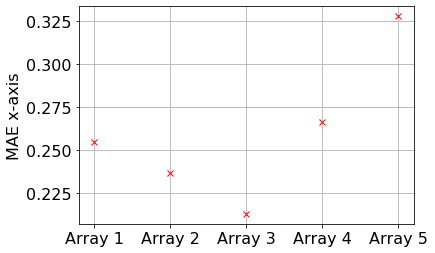

In [ ]:
#@title
array=['Array 1', 'Array 2', 'Array 3', 'Array 4', 'Array 5']
plt.plot(array,MAE_x_knn, 'xr')
plt.grid()
plt.ylabel('MAE x-axis')

MAE for y-axis

Text(0, 0.5, 'MAE y-axis')

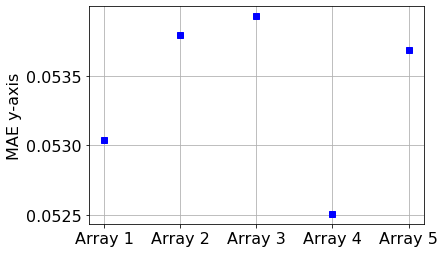

In [ ]:
#@title
plt.plot(array,MAE_y_knn, 'sb')
plt.grid()
plt.ylabel('MAE y-axis')
#plt.plot(array,MAE_z_knn, 'gd')

MAE for z-axis

Text(0, 0.5, 'MAE z-axis')

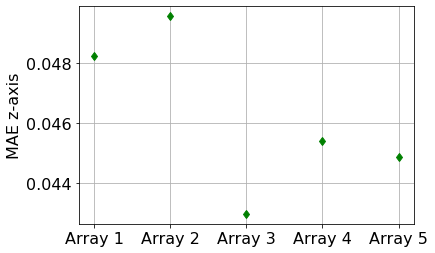

In [ ]:
#@title
plt.plot(array,MAE_z_knn, 'dg')
plt.grid()
plt.ylabel('MAE z-axis')

### Feed Forward Neural Networks

In [ ]:
# load modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# create a function to simplify the ANN architecture
def neural_network(x_train,y_train):
  xx_train,xx_test,yy_train,yy_test = train_test_split(x_train,y_train,test_size=0.3,random_state=3) 
  model = Sequential()
  model.add(Dense(20,activation='relu',input_shape=([xx_train.shape[1]])))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(5,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3,activation='linear'))
  model.compile(loss='mse', optimizer='adam',metrics=['mae'])
  check = ModelCheckpoint('/content/nn_fi/array'+str(i+1)+'.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only=False)
  model.fit(xx_train,yy_train, epochs=25, validation_data=(xx_test,yy_test), callbacks = check,verbose=0)
  return model

Train the models

In [ ]:
# nn=[]
# for i in range(5):
#   nn.append(neural_network(train_data_n[i].iloc[:,3:],train_data_n[i].iloc[:,:3]))

In [ ]:
# his = []
# for i in nn:
#   his.append(i.history)

In [ ]:
# create a function to plot the loss and metrics for training and validation
# def neural_network_learning(h):
#   plt.figure(figsize=(15,7))
#   plt.subplot(1,2,1)
#   plt.plot(h.history['loss'], label='Training')
#   plt.plot(h.history['val_loss'], label = 'Validation')
#   plt.legend()
#   plt.title('Loss')
#   plt.xlabel('Epoch')

#   plt.subplot(1,2,2)
#   plt.plot(h.history['mae'], label='Training')
#   plt.plot(h.history['val_mae'], label = 'Validation')
#   plt.legend()
#   plt.title('MAE metric')
#   plt.xlabel('Epoch')

See how ANN learnt

In [ ]:
#@title
# for i in his: 
#   neural_network_learning(i)

# plt.show()

Load the best model to evaluate the performance of the NN

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# models_nn = []
# for i in range(5):
#   models_nn.append(load_model('/content/nn_fi/array'+str(i+1)+'.hdf5'))

Load models, that were trained previously

In [ ]:
models_nn = []
for i in range(5):
  models_nn.append(load_model('/content/drive/MyDrive/RPT_SAS/modelos/modelos_ANN/array'+str(i+1)+'.hdf5'))

Test the models created

In [ ]:
Y_pred_ann=[]
for i in range(5):
  Y_pred_ann.append(models_nn[i].predict(test_data_n[i].iloc[:,3:7]))

32/32 [==============================] - 0s 1ms/step


Evaluate the metrics

In [ ]:
# calculate the averaged MEDE score for each detector array
mede_ann=[]
for i in range(5):
  mede_ann.append(mede_cal_score(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_ann[i]))

In [ ]:
# MEDE tupla
mede_vec_ann=[]
for i in range(5):
  mede_vec_ann.append(mede_cal_vector(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_ann[i]))

In [ ]:
# see the results of predictions and performance for each axis
MAE_x_ann=[]
MAE_y_ann=[]
MAE_z_ann=[]
for i in range(5):
  MAE_x_ann.append(mae_x(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_ann[i]))
  MAE_y_ann.append(mae_y(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_ann[i]))
  MAE_z_ann.append(mae_z(test_data_n[i].iloc[:,:3].to_numpy(),Y_pred_ann[i]))

Averaged MEDE for each radiation detector array

Text(0, 0.5, 'MEDE')

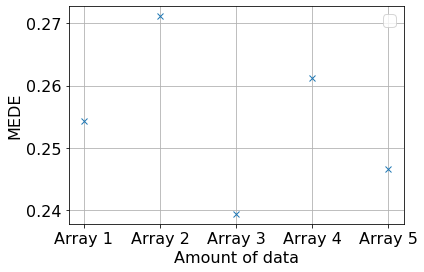

In [ ]:
#@title
plt.plot(array,mede_ann, 'x')
plt.legend()
plt.grid()
plt.xlabel('Amount of data')
plt.ylabel('MEDE')

MAE for x-axis

Text(0, 0.5, 'MAE x-axis')

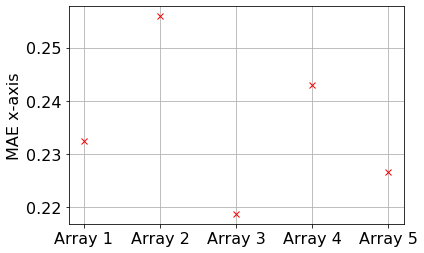

In [ ]:
#@title
plt.plot(array,MAE_x_ann, 'xr')
plt.grid()
plt.ylabel('MAE x-axis')

MAE- for y-axis

Text(0, 0.5, 'MAE y-axis')

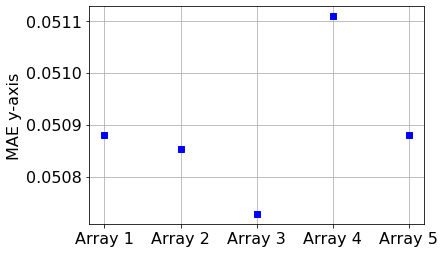

In [ ]:
#@title
plt.plot(array,MAE_y_ann, 'sb')
plt.grid()
plt.ylabel('MAE y-axis')

MAE for z-axis

Text(0, 0.5, 'MAE z-axis')

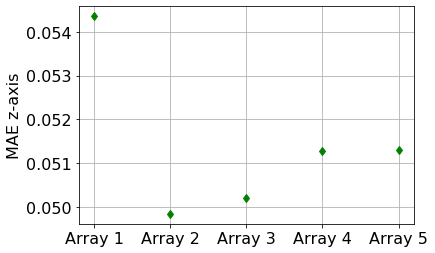

In [ ]:
#@title
plt.plot(array,MAE_z_ann, 'dg')
plt.grid()
plt.ylabel('MAE z-axis')

## Compare the results between KNN and ANN

See the results of MAE comparison for each algorithm for each axis

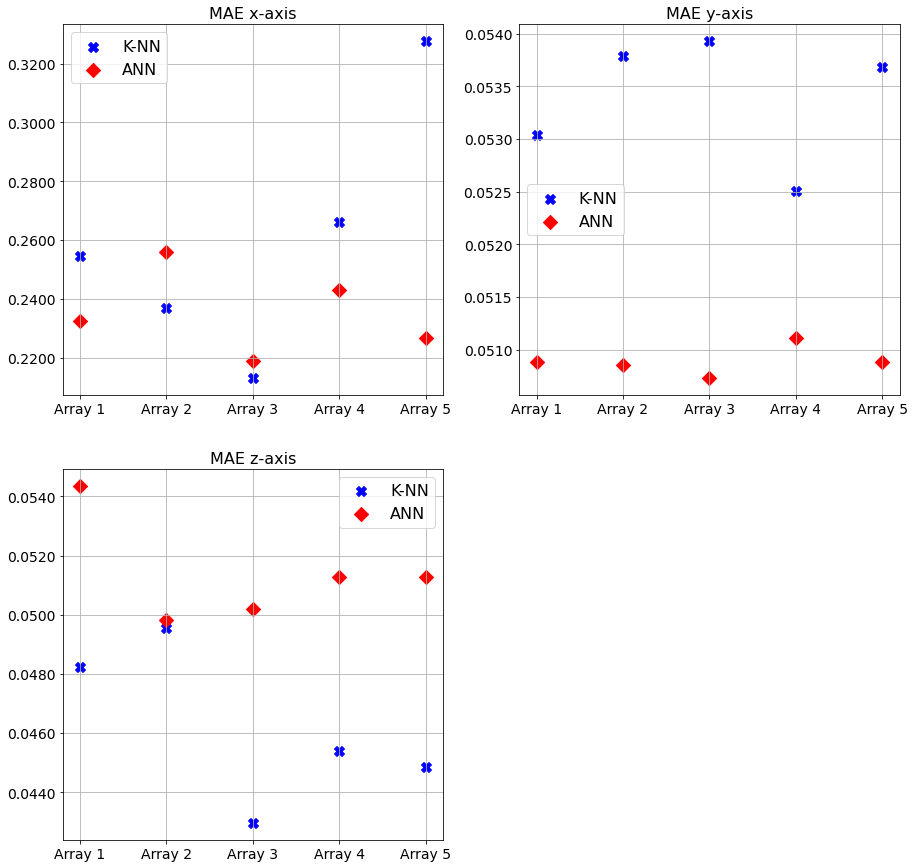

In [ ]:
#@title
fig2, ax2=plt.subplots(2,2,figsize=(15,15))
# first subplot
ax2[0,0].scatter(array,MAE_x_knn, label='K-NN', marker = 'X', s= 100, color = 'blue')
ax2[0,0].scatter(array,MAE_x_ann,  label='ANN', marker = 'D', s= 100, color = 'red')
ax2[0,0].legend()
ax2[0,0].grid()
ax2[0,0].set_title('MAE x-axis', fontsize=16)
ax2[0,0].tick_params(axis='x', labelsize=14)
# ax2[0,0].set_xticklabels(ax2[0,0].get_xticks(), fontsize=14)
ax2[0,0].set_yticklabels(ax2[0,0].get_yticks(), fontsize=14)
ax2[0,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))

# # second subplot
ax2[0,1].scatter(array,MAE_y_knn, label='K-NN', marker = 'X', s= 100, color = 'blue')
ax2[0,1].scatter(array,MAE_y_ann,  label='ANN', marker = 'D', s= 100, color = 'red')
ax2[0,1].set_title('MAE y-axis', fontsize=16)
# ax2[0,1].set_xticklabels(ax2[0,1].get_xticks(), fontsize=14)
ax2[0,1].set_yticklabels(ax2[0,1].get_yticks(), fontsize=14)
ax2[0,1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
ax2[0,1].tick_params(axis='x', labelsize=14)
ax2[0,1].legend()
ax2[0,1].grid()
# # third subplot
ax2[1,0].scatter(array,MAE_z_knn, label='K-NN', marker = 'X', s= 100, color = 'blue')
ax2[1,0].scatter(array,MAE_z_ann, label='ANN', marker = 'D', s= 100, color = 'red')
ax2[1,0].legend()
ax2[1,0].grid()
ax2[1,0].set_title('MAE z-axis', fontsize=16)
# ax2[1,0].set_xticklabels(ax2[1,0].get_xticks(), fontsize=14)
# ax2[1,0].set_yticklabels(ax2[1,0].get_yticks(), fontsize=14)
ax2[1,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
ax2[1,0].tick_params(axis='x', labelsize=14)
# # stwich off the final subplot
ax2[1,1].axis('off')
plt.savefig('figure_9.jpg',dpi=300)

See the comparison of MEDE for each array and algorithm

In [ ]:
#@title
plt.scatter(array,mede_ann, label='ANN', marker = 'D', s= 100, color = 'red')
plt.scatter(array,mede_knn, label='K-NN', marker = 'X', s= 100, color = 'blue')
plt.legend()
plt.grid()
plt.ylabel('MEDE', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figure_8.jpg',dpi=300)

# Plot visually the MEDE values

See how the MEDE error is distribuited in the RPT system with Feed Forward Artificial Neural Network

In [ ]:
#@title
from matplotlib.ticker import MaxNLocator
fig1, ax1 = plt.subplots(3,2,subplot_kw=dict(projection='3d'),figsize=(18,20))
m=0
color_map='coolwarm'
for i in range(3):
  for j in range(2):
    if i==2 and j==1:
      ax1[i,j].axis('off')
    else:
      plot_box_3d(1, 0.2, 0.2, ax1[i,j], alpha_val=0.1)
      for k in range(1000):
        ax1[i,j].set_ylim(0,0.2)
        ax1[i,j].set_zlim(0,0.2)
        ax1[i,j].set_xlabel('x-axis', fontsize=14, labelpad = 15)
        ax1[i,j].set_ylabel('y-axis', fontsize=14, labelpad = 15)
        ax1[i,j].set_zlabel('z-axis', fontsize=14, labelpad = 15)
        ax1[i,j].set_title('Array '+str(m+1),y=1.05, fontsize=15)
        p=ax1[i,j].scatter(test_data_n[m].iloc[k,0],test_data_n[m].iloc[k,1],test_data_n[m].iloc[k,2],c=mede_vec_ann[m][k],cmap = color_map,vmin=0, vmax=0.5)
        ax1[i,j].yaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].zaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].set_yticklabels(ax1[i,j].get_yticks(), fontsize=14)
        ax1[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        ax1[i,j].set_xticklabels(ax1[i,j].get_xticks(), fontsize=14)
        ax1[i,j].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        ax1[i,j].set_zticklabels(ax1[i,j].get_zticks(), fontsize=14)
        ax1[i,j].zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
      cbar=fig1.colorbar(p,ax=ax1[i,j], pad = 0.1) 
      cbar.set_label("MEDE (m)", rotation=90, labelpad=20, fontsize = 13)
      cbar.ax.tick_params(pad=2, labelsize = 13)
      m=m+1
plt.savefig('figure_11.jpg',dpi=300)

See how the error is distribuited with K-NN regressor

In [ ]:
#@title
fig1, ax1 = plt.subplots(3,2,subplot_kw=dict(projection='3d'),figsize=(18,20))
m=0
color_map='coolwarm'
for i in range(3):
  for j in range(2):
    if i==2 and j==1:
      ax1[i,j].axis('off')
    else:
      plot_box_3d(1, 0.2, 0.2, ax1[i,j], alpha_val=0.1)
      for k in range(1000):
        ax1[i,j].set_ylim(0,0.2)
        ax1[i,j].set_zlim(0,0.2)
        ax1[i,j].set_xlabel('x-axis', fontsize=14, labelpad = 15)
        ax1[i,j].set_ylabel('y-axis', fontsize=14, labelpad = 15)
        ax1[i,j].set_zlabel('z-axis', fontsize=14, labelpad = 15)
        ax1[i,j].set_title('Array '+str(m+1),y=1.05, fontsize=15)
        p=ax1[i,j].scatter(test_data_n[m].iloc[k,0],test_data_n[m].iloc[k,1],test_data_n[m].iloc[k,2],c=mede_val_knn[m][k],cmap = color_map,vmin=0, vmax=0.5)
        ax1[i,j].yaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].zaxis.set_major_locator(MaxNLocator(nbins=4))
        ax1[i,j].set_yticklabels(ax1[i,j].get_yticks(), fontsize=14)
        ax1[i,j].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        ax1[i,j].set_xticklabels(ax1[i,j].get_xticks(), fontsize=14)
        ax1[i,j].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        ax1[i,j].set_zticklabels(ax1[i,j].get_zticks(), fontsize=14)
        ax1[i,j].zaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
      cbar=fig1.colorbar(p,ax=ax1[i,j], pad = 0.1) 
      cbar.set_label("MEDE (m)", rotation=90, labelpad=20, fontsize = 13)
      cbar.ax.tick_params(pad=2, labelsize = 13)
      m=m+1
plt.savefig('figure_10.jpg',dpi=300)